In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("MSI.csv")

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1977-01-03,5.590371,5.715997,5.590371,5.602933,2.619947,227800.0
1,1977-01-04,5.577808,5.577808,5.477307,5.477307,2.561203,164100.0
2,1977-01-05,5.489870,5.602933,5.489870,5.502432,2.572954,193000.0
3,1977-01-06,5.502432,5.527557,5.464744,5.464744,2.555330,139200.0
4,1977-01-07,5.464744,5.502432,5.389369,5.389369,2.520085,119300.0
...,...,...,...,...,...,...,...
10903,2020-03-26,135.419998,149.690002,134.479996,148.990005,148.990005,1618700.0
10904,2020-03-27,144.910004,145.789993,133.580002,135.070007,135.070007,1783000.0
10905,2020-03-30,135.940002,136.679993,130.190002,133.369995,133.369995,2067300.0
10906,2020-03-31,133.050003,134.929993,130.389999,132.919998,132.919998,2817400.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10908 entries, 0 to 10907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10908 non-null  object 
 1   Open       10907 non-null  float64
 2   High       10907 non-null  float64
 3   Low        10907 non-null  float64
 4   Close      10907 non-null  float64
 5   Adj Close  10907 non-null  float64
 6   Volume     10907 non-null  float64
dtypes: float64(6), object(1)
memory usage: 596.7+ KB


In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10907 entries, 0 to 10907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10907 non-null  object 
 1   Open       10907 non-null  float64
 2   High       10907 non-null  float64
 3   Low        10907 non-null  float64
 4   Close      10907 non-null  float64
 5   Adj Close  10907 non-null  float64
 6   Volume     10907 non-null  float64
dtypes: float64(6), object(1)
memory usage: 681.7+ KB


In [19]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\jitendra\AppData\Local\Temp\ipykernel_5400\936118274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10907 entries, 0 to 10907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10907 non-null  datetime64[ns]
 1   Open       10907 non-null  float64       
 2   High       10907 non-null  float64       
 3   Low        10907 non-null  float64       
 4   Close      10907 non-null  float64       
 5   Adj Close  10907 non-null  float64       
 6   Volume     10907 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 681.7 KB


In [21]:
df["Daily_Return"] = df["Close"].pct_change() * 100

C:\Users\jitendra\AppData\Local\Temp\ipykernel_5400\1020869698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Daily_Return"] = df["Close"].pct_change() * 100


In [22]:
df["Month"] = df["Date"].dt.to_period("M")

C:\Users\jitendra\AppData\Local\Temp\ipykernel_5400\1670205507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].dt.to_period("M")


In [23]:
Monthly_Return = df.groupby("Month")["Close"].last().pct_change() * 100

In [24]:
Monthly_Return

Month
1977-01          NaN
1977-02   -12.189059
1977-03     4.249290
1977-04    -5.706515
1977-05   -15.850149
             ...    
2019-12    -3.682011
2020-01     9.842374
2020-02    -6.395484
2020-03   -19.773054
2020-04    -5.138431
Freq: M, Name: Close, Length: 520, dtype: float64

In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Month
0,1977-01-03,5.590371,5.715997,5.590371,5.602933,2.619947,227800.0,NaN,1977-01
1,1977-01-04,5.577808,5.577808,5.477307,5.477307,2.561203,164100.0,-2.242149,1977-01
2,1977-01-05,5.489870,5.602933,5.489870,5.502432,2.572954,193000.0,0.458711,1977-01
3,1977-01-06,5.502432,5.527557,5.464744,5.464744,2.555330,139200.0,-0.684929,1977-01
4,1977-01-07,5.464744,5.502432,5.389369,5.389369,2.520085,119300.0,-1.379306,1977-01
...,...,...,...,...,...,...,...,...,...
10903,2020-03-26,135.419998,149.690002,134.479996,148.990005,148.990005,1618700.0,11.469401,2020-03
10904,2020-03-27,144.910004,145.789993,133.580002,135.070007,135.070007,1783000.0,-9.342907,2020-03
10905,2020-03-30,135.940002,136.679993,130.190002,133.369995,133.369995,2067300.0,-1.258616,2020-03
10906,2020-03-31,133.050003,134.929993,130.389999,132.919998,132.919998,2817400.0,-0.337405,2020-03


In [27]:
volitality = df["Daily_Return"].std()

In [29]:
print("volitality : ", volitality)

volitality :  2.3751696197529792


In [30]:
df["MA20"] = df["Close"].rolling(20).mean()

C:\Users\jitendra\AppData\Local\Temp\ipykernel_5400\845702869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MA20"] = df["Close"].rolling(20).mean()


In [35]:
df["MA50"] = df["Close"].rolling(50).mean()

C:\Users\jitendra\AppData\Local\Temp\ipykernel_5400\2451287384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MA50"] = df["Close"].rolling(50).mean()


In [36]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Month,MA20,MA50
0,1977-01-03,5.590371,5.715997,5.590371,5.602933,2.619947,227800.0,NaN,1977-01,NaN,NaN
1,1977-01-04,5.577808,5.577808,5.477307,5.477307,2.561203,164100.0,-2.242149,1977-01,NaN,NaN
2,1977-01-05,5.489870,5.602933,5.489870,5.502432,2.572954,193000.0,0.458711,1977-01,NaN,NaN
3,1977-01-06,5.502432,5.527557,5.464744,5.464744,2.555330,139200.0,-0.684929,1977-01,NaN,NaN
4,1977-01-07,5.464744,5.502432,5.389369,5.389369,2.520085,119300.0,-1.379306,1977-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10903,2020-03-26,135.419998,149.690002,134.479996,148.990005,148.990005,1618700.0,11.469401,2020-03,155.700500,169.959401
10904,2020-03-27,144.910004,145.789993,133.580002,135.070007,135.070007,1783000.0,-9.342907,2020-03,154.170001,169.249801
10905,2020-03-30,135.940002,136.679993,130.190002,133.369995,133.369995,2067300.0,-1.258616,2020-03,152.164001,168.460001
10906,2020-03-31,133.050003,134.929993,130.389999,132.919998,132.919998,2817400.0,-0.337405,2020-03,150.060500,167.596001


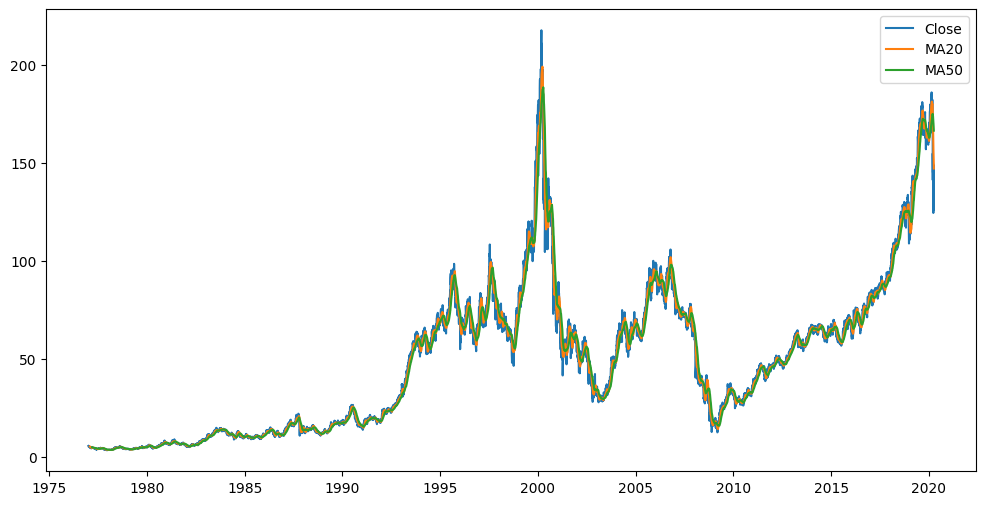

In [41]:
plt.figure(figsize=(12, 6))

plt.plot(df["Date"], df["Close"], label = "Close")
plt.plot(df["Date"], df["MA20"], label = "MA20")
plt.plot(df["Date"], df["MA50"], label = "MA50")

plt.legend()
plt.show()


In [42]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Month,MA20,MA50
0,1977-01-03,5.590371,5.715997,5.590371,5.602933,2.619947,227800.0,NaN,1977-01,NaN,NaN
1,1977-01-04,5.577808,5.577808,5.477307,5.477307,2.561203,164100.0,-2.242149,1977-01,NaN,NaN
2,1977-01-05,5.489870,5.602933,5.489870,5.502432,2.572954,193000.0,0.458711,1977-01,NaN,NaN
3,1977-01-06,5.502432,5.527557,5.464744,5.464744,2.555330,139200.0,-0.684929,1977-01,NaN,NaN
4,1977-01-07,5.464744,5.502432,5.389369,5.389369,2.520085,119300.0,-1.379306,1977-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10903,2020-03-26,135.419998,149.690002,134.479996,148.990005,148.990005,1618700.0,11.469401,2020-03,155.700500,169.959401
10904,2020-03-27,144.910004,145.789993,133.580002,135.070007,135.070007,1783000.0,-9.342907,2020-03,154.170001,169.249801
10905,2020-03-30,135.940002,136.679993,130.190002,133.369995,133.369995,2067300.0,-1.258616,2020-03,152.164001,168.460001
10906,2020-03-31,133.050003,134.929993,130.389999,132.919998,132.919998,2817400.0,-0.337405,2020-03,150.060500,167.596001


In [43]:
df.to_csv("SMP_Done", index = False)